<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Deep%20Learning%20with%20Complex%20Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 19: Deep Learning Review**

---
### **Description**
In this week's lab, you will work on two projects using Deep Learning to classify variations on the MNIST digits dataset that involve more complex imagery.

<br>

### **Lab Structure**
**Part 1**: [MNIST Digit Classifiction](#p1)

> **Part 1.1**: [The Initial Attempt](#p1.1)

> **Part 1.2**: [Improvements](#p1.2)

**Part 2**: [Kuzushiji-MNIST Letter Classifiction](#p2)

> **Part 2.1**: [The Initial Attempt](#p2.1)

> **Part 2.2**: [Improvements](#p2.2)

<br>




### **Learning Objectives**
By the end of this lab, you will have trained, implemented, and evaluated a deep learning image classification model that is able to achieve over 85% accuracy on the validation dataset.

<br>


### **Cheat Sheets**
* [Deep Learning with keras](https://docs.google.com/document/d/1WCV2ok7dwPWCid5vdOImknCAJS2te5aQ8yRp6J5Clac/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
from keras.models import Sequential
from keras.layers import *

from IPython.display import Image
from keras.datasets import mnist, cifar100
from torchvision.datasets import KMNIST
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<a name="p1"></a>

---
## **Part 1: MNIST Digit Classification**
---

In this section, we will build, fit, and evaluate Neural Networks for classifying handwritten digits.

<a name="p1.1"></a>

---
### **Part 1.1: The Initial Attempt**
---


#### **Step #1: Import and split the dataset into a train/test set**


**Run the code below to load the dataset.**

11490434/11490434 [==============================] - 0s 0us/step


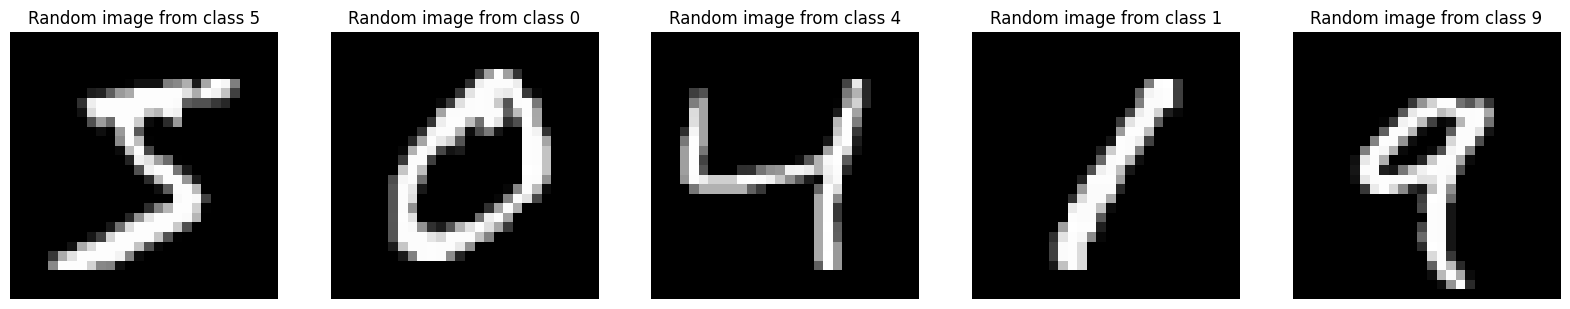

In [ ]:
# import
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Show a few images from the dataset
plt.figure(figsize=(20,5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Random image from class {y_train[i]}")
  plt.imshow(X_train[i], cmap='gray')
  plt.axis("off")

plt.show()

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### **Step #2: Determine the dimensions of the data**


Next, let's determine the shape of the data so that we know how to properly setup the input layer of our Neural Network. Specifically, use `X_train.shape` to see what the dimensions of the data is and decide if it needs to be flattened.

<br>

For example, if the `.shape` method returned the tuple:
* `(10,5)`, this would tell us that there are 10 data points each with 5 values. This would not need to be flattened.
* `(10,5,2)`, it would need to be flattened so that instead of each datapoint being a `(5,2)` matrix it is a `(10,1)` flat array.

<br>

**Determine if the data needs to be flattened.**

In [ ]:
X_train.shape

#### **Steps #3 - 6: Build the Model**


Build a NN such that it has:
* The correct number of input neurons (one for each feature). Flattened if need be.
* No hidden layers.
* Ten output neurons with the `'softmax'` activation function. This is the typical output activation function for classification. **NOTE: You need one output neuron per class (digit).**

In [ ]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
model_nn = Sequential()
model_nn.add(Dense(units=10, input_shape=(784,), activation='softmax'))

#### **Step #7: Fit the model**

Train the NN such that the:
* `loss = 'categorical_crossentropy'`. This is a typical loss function for one hot encoded categorical variables. It compares the probabilities of outputs.
* `metrics = ['accuracy']`.

In [ ]:
# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, validation_split = 0.1, epochs=10, batch_size = 16)

Epoch 1/10
3375/3375 [==============================] - 9s 2ms/step - loss: 0.4311 - accuracy: 0.8852 - val_loss: 0.2553 - val_accuracy: 0.9263
Epoch 2/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.3013 - accuracy: 0.9150 - val_loss: 0.2359 - val_accuracy: 0.9358
Epoch 3/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.2836 - accuracy: 0.9198 - val_loss: 0.2325 - val_accuracy: 0.9360
Epoch 4/10
3375/3375 [==============================] - 6s 2ms/step - loss: 0.2748 - accuracy: 0.9227 - val_loss: 0.2270 - val_accuracy: 0.9377
Epoch 5/10
3375/3375 [==============================] - 8s 3ms/step - loss: 0.2686 - accuracy: 0.9251 - val_loss: 0.2277 - val_accuracy: 0.9380
Epoch 6/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.2655 - accuracy: 0.9261 - val_loss: 0.2268 - val_accuracy: 0.9375
Epoch 7/10
3375/3375 [==============================] - 7s 2ms/step - loss: 0.2617 - accuracy: 0.9271 - val_loss: 0.2236 - val_accuracy:

#### **Print the learned weights and biases.**

**NOTE**: One of the main strengths of Deep Learning is its ability to learn an enormous number of parameters (weights and biases). This also means that looking at those parameters individually starts lose much meaning.

In [ ]:
layers = model_nn.layers

for i in range(len(layers)):
  print('\nLayer ' + str(i))
  if len(layers[i].get_weights()) > 0:
    print('Weights: \n' + str(layers[i].get_weights()[0]))
    print('\nBiases: \n' + str(layers[i].get_weights()[1]))


Layer 0
Weights: 
[[-0.00085768  0.06770135  0.01456569 ...  0.00117018  0.06391472
   0.06686748]
 [-0.02927241 -0.05875938  0.01689576 ...  0.01313464  0.06570212
   0.05426539]
 [ 0.0819765  -0.02537626 -0.04772053 ... -0.04461079 -0.01901823
  -0.03376019]
 ...
 [-0.01130126  0.05762444  0.04265422 ... -0.05741434  0.02475294
   0.01695032]
 [ 0.07310306  0.05151147 -0.05039269 ...  0.06049214  0.03057518
   0.04690029]
 [ 0.00508704  0.02920876 -0.02024572 ...  0.06118659 -0.07397374
  -0.03919756]]

Biases: 
[-0.58216006  0.7849974   0.12623027 -0.44573683  0.13824588  1.5907627
 -0.23125021  0.8875526  -1.6859071  -0.4150466 ]


#### **Step #8: Evaluate the model**

Specifically, create two plots:
1. The loss of the NN vs. epochs for both the training and validation sets.

2. The accuracy of the NN vs. epochs for both the training and validation sets. You can do this by replaced `'loss'` with `'accuracy'` anywhere you find it in the code.

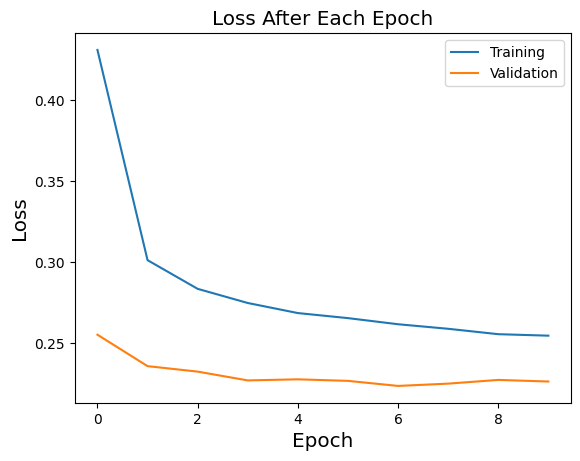

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
plt.plot(train_loss, label = 'Training')

val_loss = history.history['val_loss']
plt.plot(val_loss, label = 'Validation')

plt.title('Loss After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Loss', fontsize = 'x-large')
plt.legend()
plt.show()

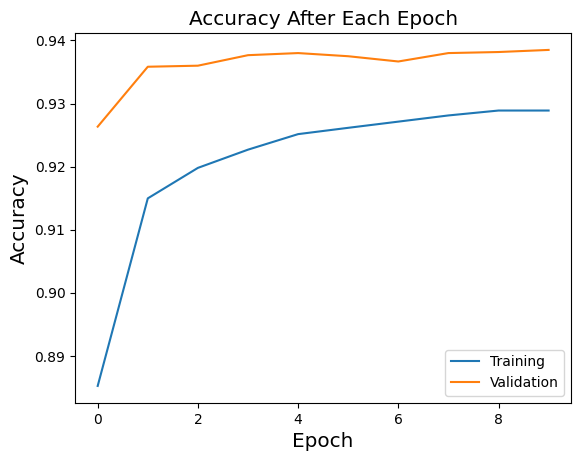

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
plt.plot(train_accuracy, label='Training')

val_accuracy = history.history['val_accuracy']
plt.plot(val_accuracy, label = 'Validation')

plt.title('Accuracy After Each Epoch', fontsize = 'x-large')
plt.xlabel('Epoch', fontsize = 'x-large')
plt.ylabel('Accuracy', fontsize = 'x-large')
plt.legend()
plt.show()

<a name="p1.2"></a>

---
### **Part 1.2: Improvements**
---


Now, improve this model. Consider:
* Adding hidden layers with around the same number of neurons as there are input features (pixels).
* Using non-linear activation functions in any hidden layers.
* Training with a different learning rate.
* Training with more epochs.
* Training with a different batch size.

<br>

Create learning curves to ensure you are creating an improved model.

<br>

**NOTE**: As a benchmark, we were able to train a model that achieved a training accuracy of 99.6% and validation accuracy of 97.9%. See if you can reach or improve upon this, particularly in closing the generalization gap (the difference between the training and validation accuracies).

Epoch 1/20
469/469 [==============================] - ETA: 0s - loss: 0.1985 - accuracy: 0.9395
Epoch 1: val_accuracy improved from -inf to 0.97030, saving model to best_model.h5
469/469 [==============================] - 17s 34ms/step - loss: 0.1985 - accuracy: 0.9395 - val_loss: 0.0974 - val_accuracy: 0.9703
Epoch 2/20
  3/469 [..............................] - ETA: 13s - loss: 0.1096 - accuracy: 0.9661

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


468/469 [============================>.] - ETA: 0s - loss: 0.0735 - accuracy: 0.9771
Epoch 2: val_accuracy improved from 0.97030 to 0.97650, saving model to best_model.h5
469/469 [==============================] - 16s 34ms/step - loss: 0.0734 - accuracy: 0.9772 - val_loss: 0.0785 - val_accuracy: 0.9765
Epoch 3/20
468/469 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9851
Epoch 3: val_accuracy improved from 0.97650 to 0.97690, saving model to best_model.h5
469/469 [==============================] - 17s 35ms/step - loss: 0.0482 - accuracy: 0.9851 - val_loss: 0.0768 - val_accuracy: 0.9769
Epoch 4/20
469/469 [==============================] - ETA: 0s - loss: 0.0354 - accuracy: 0.9884
Epoch 4: val_accuracy improved from 0.97690 to 0.97760, saving model to best_model.h5
469/469 [==============================] - 16s 34ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.0775 - val_accuracy: 0.9776
Epoch 5/20
469/469 [==============================] - ETA: 0s - lo

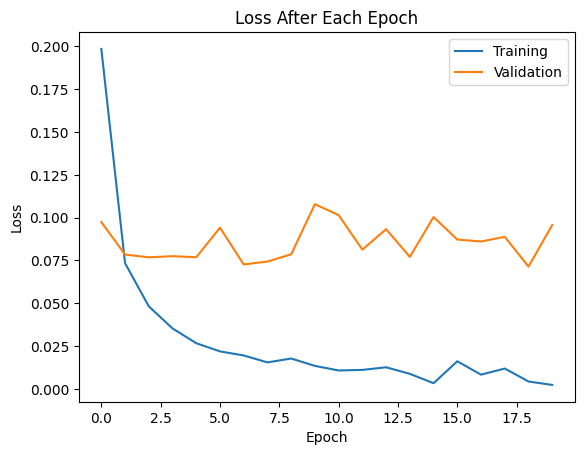

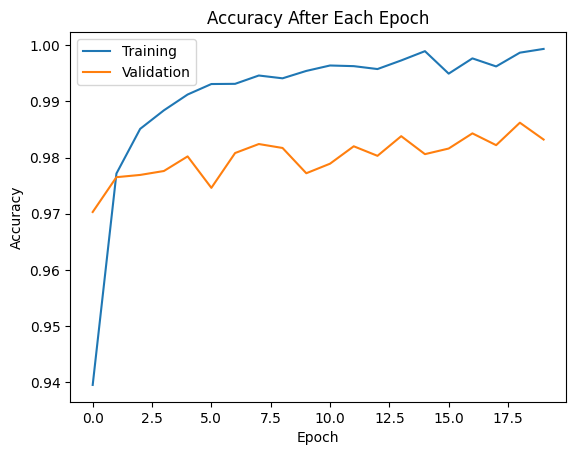

In [ ]:
# BUILD
#=======

improved_model = Sequential()
improved_model.add(Dense(units=784, input_shape=(784,), activation='relu'))  # Hidden layer with the same number of neurons as input features
improved_model.add(Dense(units=784, activation='relu'))  # Additional hidden layer
improved_model.add(Dense(units=10, activation='softmax'))  # Output layer
optimizer = Adam(learning_rate=0.001)  # Using a different learning rate
improved_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# FIT
#=====
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = improved_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), callbacks=[checkpoint])

# EVALUATE
#==========
# VISUALIZE LOSS CURVES
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.title('Loss After Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# VISUALIZE ACCURACY CURVES
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(train_accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')
plt.title('Accuracy After Each Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Run the code below to make predictions on the test set using your final model.**

313/313 [==============================] - 1s 3ms/step


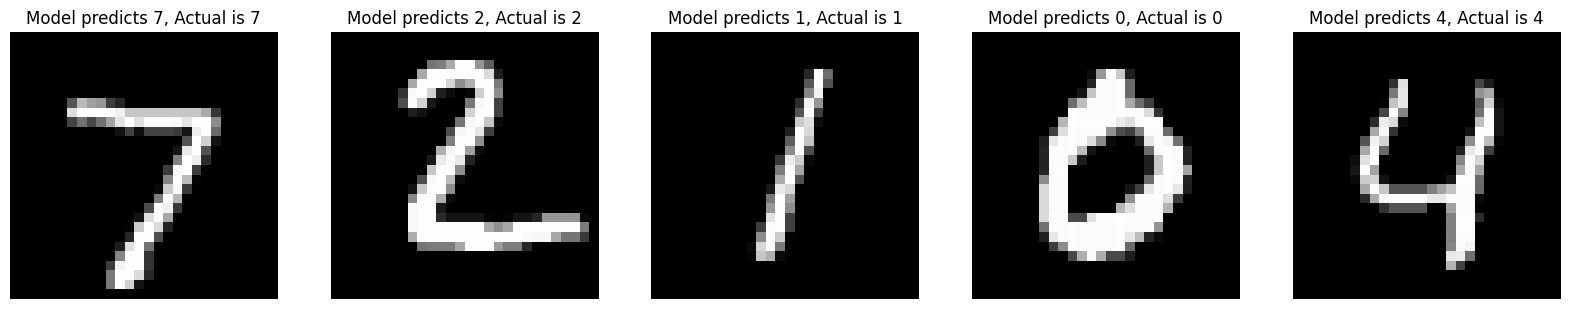

In [ ]:
# Flatten X_test before making predictions
X_test = X_test.reshape(-1, 28*28)

# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(d) for d in model_nn.predict(X_test)]

# Reshape flattened images back to 2D format
X_test = X_test.reshape(-1, 28, 28)

# Plot images with predicted labels
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}, Actual is {np.argmax(y_test[i])}")
  plt.imshow(X_test[i], cmap='gray')
  plt.axis("off")

plt.show()

<a name="p2"></a>

---
## **Part 2: Kuzushiji-MNIST Letter Classifiction**
---

![Kanji](https://raw.githubusercontent.com/rois-codh/kmnist/master/images/kkanji_examples.png)

<center>

*Image taken from the Kuzushiji-MNIST dataset.*

</center>

<br>

The `K-MNIST` dataset is a newer MNIST-like dataset containing 10 phonetic letters of Hiragana, a Japanese syllabary and component of the Japanese writing system. One intention of the dataset was to link Hiragana from classical literature to modern counterparts (UTF-8 encoded).

Using deep learning, you will develop and evaluate various neural networks to train an AI in image recognition. This project will challenge you to design your own neural networks and evaluate how your choices of hyperparameters impacted your models' accuracies.

<br>

**Your goal is to create a model that classifies the Hirgana letters from the test dataset with 90% accuracy or more.**

<a name="p2.1"></a>

---
### **Part 2.1: The Initial Attempt**
---


#### **Step #1: Import and split the dataset into a train/test set**


**Run the code below to load the dataset.**

100%|██████████| 18165135/18165135 [00:16<00:00, 1113520.20it/s]


Extracting ./KMNIST/raw/train-images-idx3-ubyte.gz to ./KMNIST/raw



100%|██████████| 29497/29497 [00:00<00:00, 205184.68it/s]


Extracting ./KMNIST/raw/train-labels-idx1-ubyte.gz to ./KMNIST/raw



100%|██████████| 3041136/3041136 [00:03<00:00, 909791.25it/s] 


Extracting ./KMNIST/raw/t10k-images-idx3-ubyte.gz to ./KMNIST/raw



100%|██████████| 5120/5120 [00:00<00:00, 11917223.35it/s]
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Extracting ./KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./KMNIST/raw



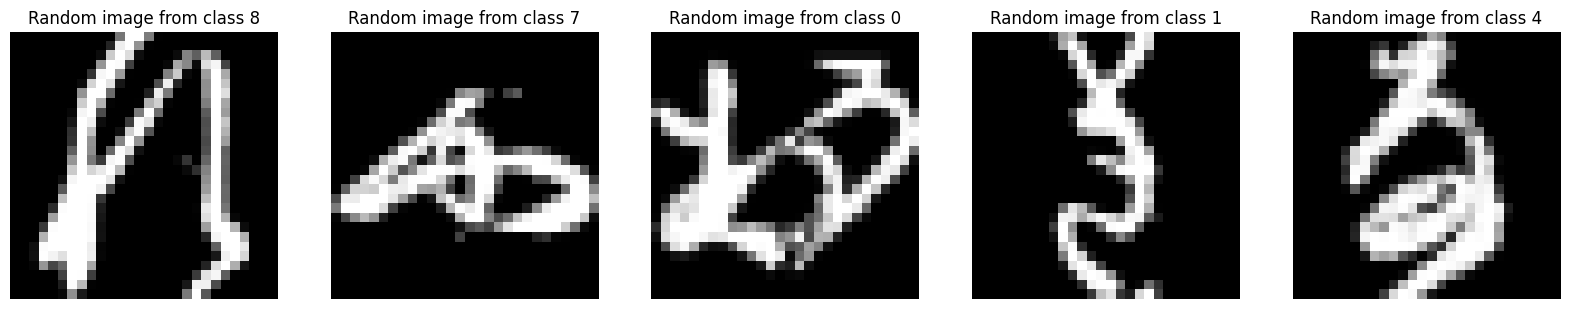

In [ ]:
kmnist_train = KMNIST('.', download='true')
X_train, y_train = kmnist_train.train_data.data.numpy(), kmnist_train.train_labels

kmnist_test = KMNIST('.', download='true', train=False)
X_test, y_test = kmnist_test.test_data.data.numpy(), kmnist_test.test_labels


plt.figure(figsize=(20,5))

# Show a few images from the dataset
for i in range(5):
  plt.subplot(1, 5, i + 1)
  plt.title(f"Random image from class {y_train[i]}")
  plt.imshow(X_train[i], cmap='gray')
  plt.axis("off")

plt.show()

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### **Step #2: Determine the dimensions of the data**

Next, let's determine the shape of the data so that we know how to properly setup the input layer of our Neural Network.

<br>

**IMPORTANT**: While we knew there 10 digits/labels in the Part above, we may not always be familiar with the label enough to know how many unique categories there are. While this is something that is important to verify, we can quickly check how many categories were created for the label by looking at `y_train.shape`.

In [ ]:
# FEATURES SHAPE
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
# LABELS SHAPE
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


#### **Steps #3 - 6: Build the Model**


Build a NN such that it has:
* The correct number of input neurons (one for each feature). Flattened if need be.
* No hidden layers.
* Ten output neurons with the `'softmax'` activation function. This is the typical output activation function for classification. **NOTE: You need one output neuron per class (digit).**

In [ ]:
model_nn = Sequential()
model_nn.add(Flatten(input_shape=X_train.shape[1:]))
model_nn.add(Dense(10, activation='softmax'))

#### **Step #7: Fit the model**

Train the NN such that the:
* `loss = 'categorical_crossentropy'`. This is a typical loss function for one hot encoded categorical variables. It compares the probabilities of outputs.
* `metrics = ['accuracy']`.

In [ ]:
# Compile the model
opt = Adam(learning_rate = 0.1)
model_nn.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
history = model_nn.fit(X_train, y_train, validation_split = 0.1, epochs=10, batch_size = 16)

Epoch 1/10
3375/3375 [==============================] - 8s 2ms/step - loss: 6.4642 - accuracy: 0.7208 - val_loss: 7.9809 - val_accuracy: 0.7185
Epoch 2/10
3375/3375 [==============================] - 7s 2ms/step - loss: 7.0405 - accuracy: 0.7414 - val_loss: 7.0625 - val_accuracy: 0.7563
Epoch 3/10
3375/3375 [==============================] - 6s 2ms/step - loss: 7.1366 - accuracy: 0.7470 - val_loss: 7.4914 - val_accuracy: 0.7442
Epoch 4/10
3375/3375 [==============================] - 7s 2ms/step - loss: 7.1034 - accuracy: 0.7493 - val_loss: 7.6944 - val_accuracy: 0.7378
Epoch 5/10
3375/3375 [==============================] - 11s 3ms/step - loss: 6.9602 - accuracy: 0.7507 - val_loss: 7.9154 - val_accuracy: 0.7518
Epoch 6/10
3375/3375 [==============================] - 12s 4ms/step - loss: 7.1672 - accuracy: 0.7523 - val_loss: 10.4827 - val_accuracy: 0.6905
Epoch 7/10
3375/3375 [==============================] - 6s 2ms/step - loss: 7.2241 - accuracy: 0.7538 - val_loss: 9.5235 - val_accura

#### **Step #8: Evaluate the model**

Specifically, create two plots:
1. The loss of the NN vs. epochs for both the training and validation sets.

2. The accuracy of the NN vs. epochs for both the training and validation sets. You can do this by replaced `'loss'` with `'accuracy'` anywhere you find it in the code.

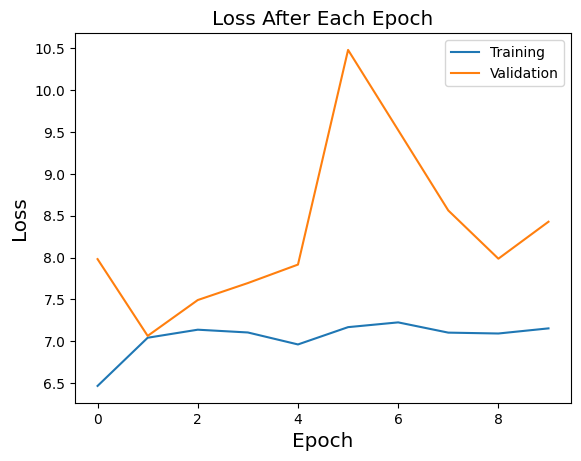

In [ ]:
# VISUALIZE
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')

plt.title('Loss After Each Epoch', fontsize='x-large')
plt.xlabel('Epoch', fontsize='x-large')
plt.ylabel('Loss', fontsize='x-large')
plt.legend()
plt.show()

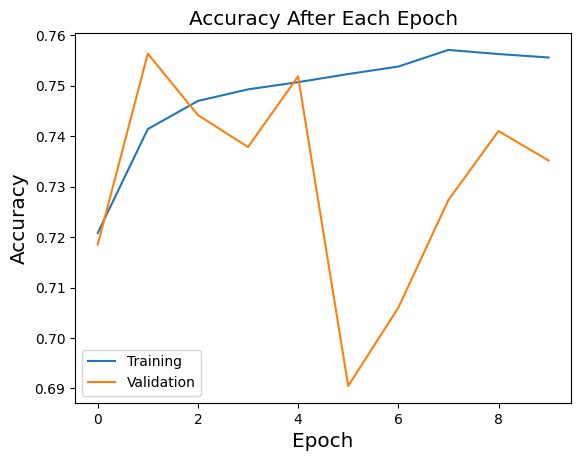

In [ ]:
# VISUALIZE
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')

plt.title('Accuracy After Each Epoch', fontsize='x-large')
plt.xlabel('Epoch', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')
plt.legend()
plt.show()

<a name="p2.2"></a>

---
### **Part 2.2: Improvements**
---


Now, improve this model. Consider:
* Adding hidden layers with around the same number of neurons as there are input features (pixels).
* Using non-linear activation functions in any hidden layers.
* Training with a different learning rate.
* Training with more epochs.
* Training with a different batch size.

<br>

Create learning curves to ensure you are creating an improved model.

<br>

**NOTE**: As a benchmark, we were able to train a model that achieved a training accuracy of 99.6% and validation accuracy of 97.9%. See if you can reach or improve upon this, particularly in closing the generalization gap (the difference between the training and validation accuracies).

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 0.4060 - accuracy: 0.8765 - val_loss: 0.5028 - val_accuracy: 0.8462
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1725 - accuracy: 0.9491 - val_loss: 0.4053 - val_accuracy: 0.8824
Epoch 3/20
469/469 [==============================] - 5s 10ms/step - loss: 0.1123 - accuracy: 0.9669 - val_loss: 0.3715 - val_accuracy: 0.8888
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0765 - accuracy: 0.9778 - val_loss: 0.3731 - val_accuracy: 0.8984
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0542 - accuracy: 0.9838 - val_loss: 0.3952 - val_accuracy: 0.8981
Epoch 6/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0366 - accuracy: 0.9893 - val_loss: 0.4285 - val_accuracy: 0.8954
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0299 - accuracy: 0.9913 - val_loss: 0.4646 - val_accuracy: 0.8896
Ep

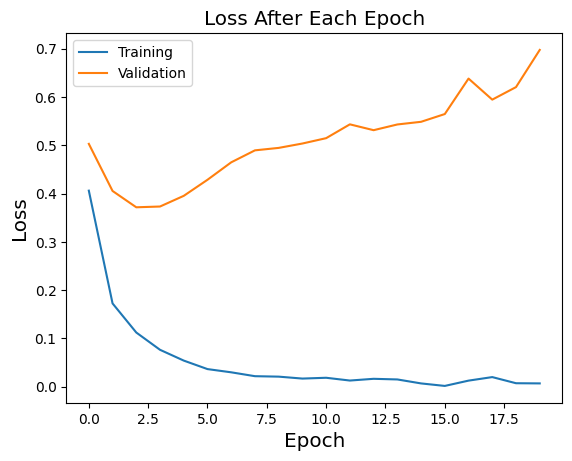

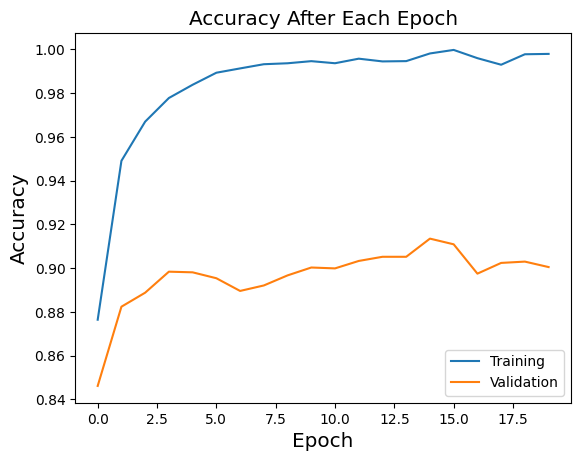

In [ ]:
# BUILD
# Define the improved model
improved_model = Sequential([
    Flatten(input_shape=X_train.shape[1:]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# FIT
# Compile the model with different learning rate and optimizer
improved_model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs and a different batch size
history = improved_model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

# EVALUATE
# Visualize loss curves
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')

plt.title('Loss After Each Epoch', fontsize='x-large')
plt.xlabel('Epoch', fontsize='x-large')
plt.ylabel('Loss', fontsize='x-large')
plt.legend()
plt.show()

# Visualize accuracy curves
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')

plt.title('Accuracy After Each Epoch', fontsize='x-large')
plt.xlabel('Epoch', fontsize='x-large')
plt.ylabel('Accuracy', fontsize='x-large')
plt.legend()
plt.show()

**Run the code below to make predictions on the test set using your final model.**

313/313 [==============================] - 1s 3ms/step


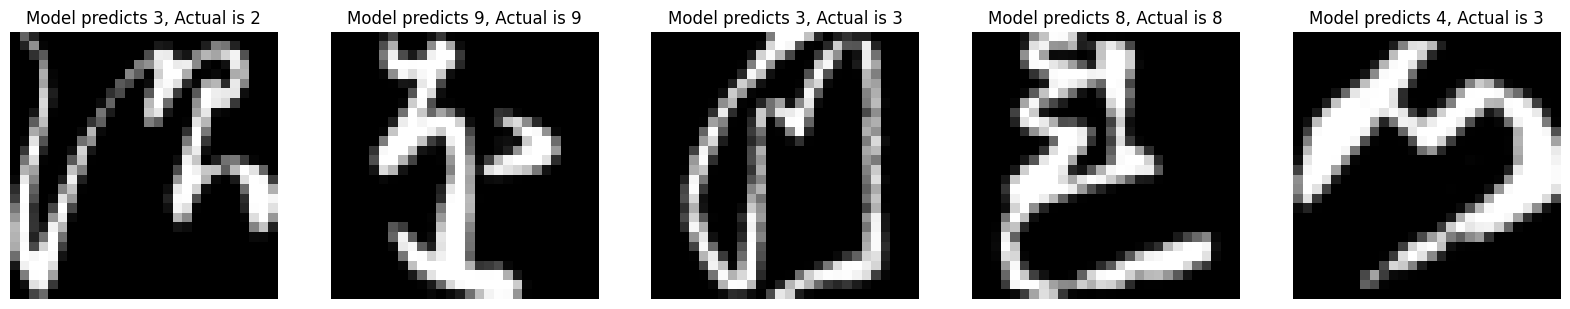

In [ ]:
# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(d) for d in model_nn.predict(X_test)]


# Plot images with predicted labes
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}, Actual is {np.argmax(y_test[i])}")
  plt.imshow(X_test[i], cmap='gray')
  plt.axis("off")

plt.show()

# End of notebook

---
### © 2024 The Coding School, All rights reserved